In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
import joblib

In [21]:
s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))


from joblib import Memory
memory = Memory("cachedir")

@memory.cache
def calc_mesh(nx, mx):
    L = 2 * np.pi
    x_ = np.linspace(0, L, nx)
    x_fine = np.array(np.meshgrid(x_, x_))
    
    h = L / mx
    tmp = np.linspace(h, L, mx)
    x_m = np.array(np.meshgrid(tmp, tmp))

    h = 2 * np.pi / mx
    
    return x_fine, x_m, h
    

@memory.cache
def calc_coeffs(i, j, nx, mx):
    x_fine, x_m, h = calc_mesh(nx, mx)
    return s_n(x_fine[0] - x_m[0, i, j], h) * s_n(x_fine[1] - x_m[1, i, j], h)

In [22]:
s_n = lambda x, h: np.where(np.abs(x) < 1e-5, 1.0, np.sin(np.pi * x / h) / np.tan(x / 2) / (2 * np.pi / h))

def f_peri(coords):
    xx, yy = coords * 200.0 / 2 / np.pi
    pil = np.pi / 200.0
    return 0.5 + 0.01 * (
        np.cos(6 * pil * xx) * np.cos(8 * pil * yy) + (
            np.cos(8 * pil * xx) * np.cos(6 * pil * yy)
        )**2 + np.cos(2 * pil * xx - 10 * pil * yy) * np.cos(4 * pil * xx - 2 * pil * yy)
    )


def p2_slow(v_m, nx, mx):
    sum_ = 0.0
    for i in range(v_m.shape[0]):
        for j in range(v_m.shape[1]):
            sum_ += v_m[i, j] * calc_coeffs(i, j, nx, mx)
    
    return sum_

In [26]:
nx = 1000
mx = 10

x_fine, x_m, h = calc_mesh(nx, mx)

v_m = f_peri(x_m)

In [27]:
pp_slow = p2_slow(v_m, nx, mx)

In [29]:
%%timeit
pp_slow = p2_slow(v_m, nx, mx)

254 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


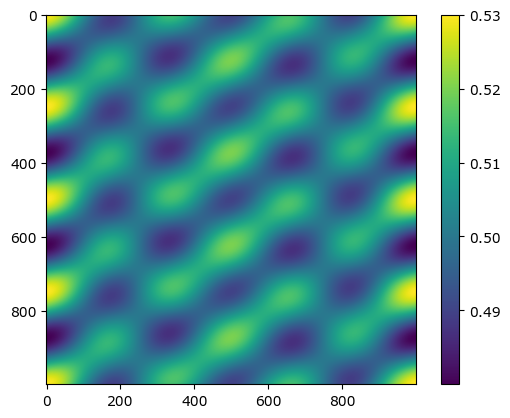

In [28]:
plt.imshow(pp_slow)
plt.colorbar()